In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/sales.csv',index_col=0, parse_dates=True)
df

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3
1990-06-01,168.5
1990-07-01,231.8
1990-08-01,224.5
1990-09-01,192.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1990-01-01 to 1992-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [7]:
df.shape

(36, 1)

# Upsampling

In [8]:
upsampled = df.resample('D').mean()   #('D') represents daily samples
upsampled

,Sales
Month,
1990-01-01,266.0
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
...,...
1992-11-27,NaN
1992-11-28,NaN
1992-11-29,NaN


# Interpolate the missing values

In [9]:
interpolated = upsampled.interpolate()
interpolated

,Sales
Month,
1990-01-01,266.000000
1990-01-02,262.125806
1990-01-03,258.251613
1990-01-04,254.377419
1990-01-05,250.503226
...,...
1992-11-27,638.153333
1992-11-28,640.340000
1992-11-29,642.526667


<AxesSubplot:xlabel='Month'>

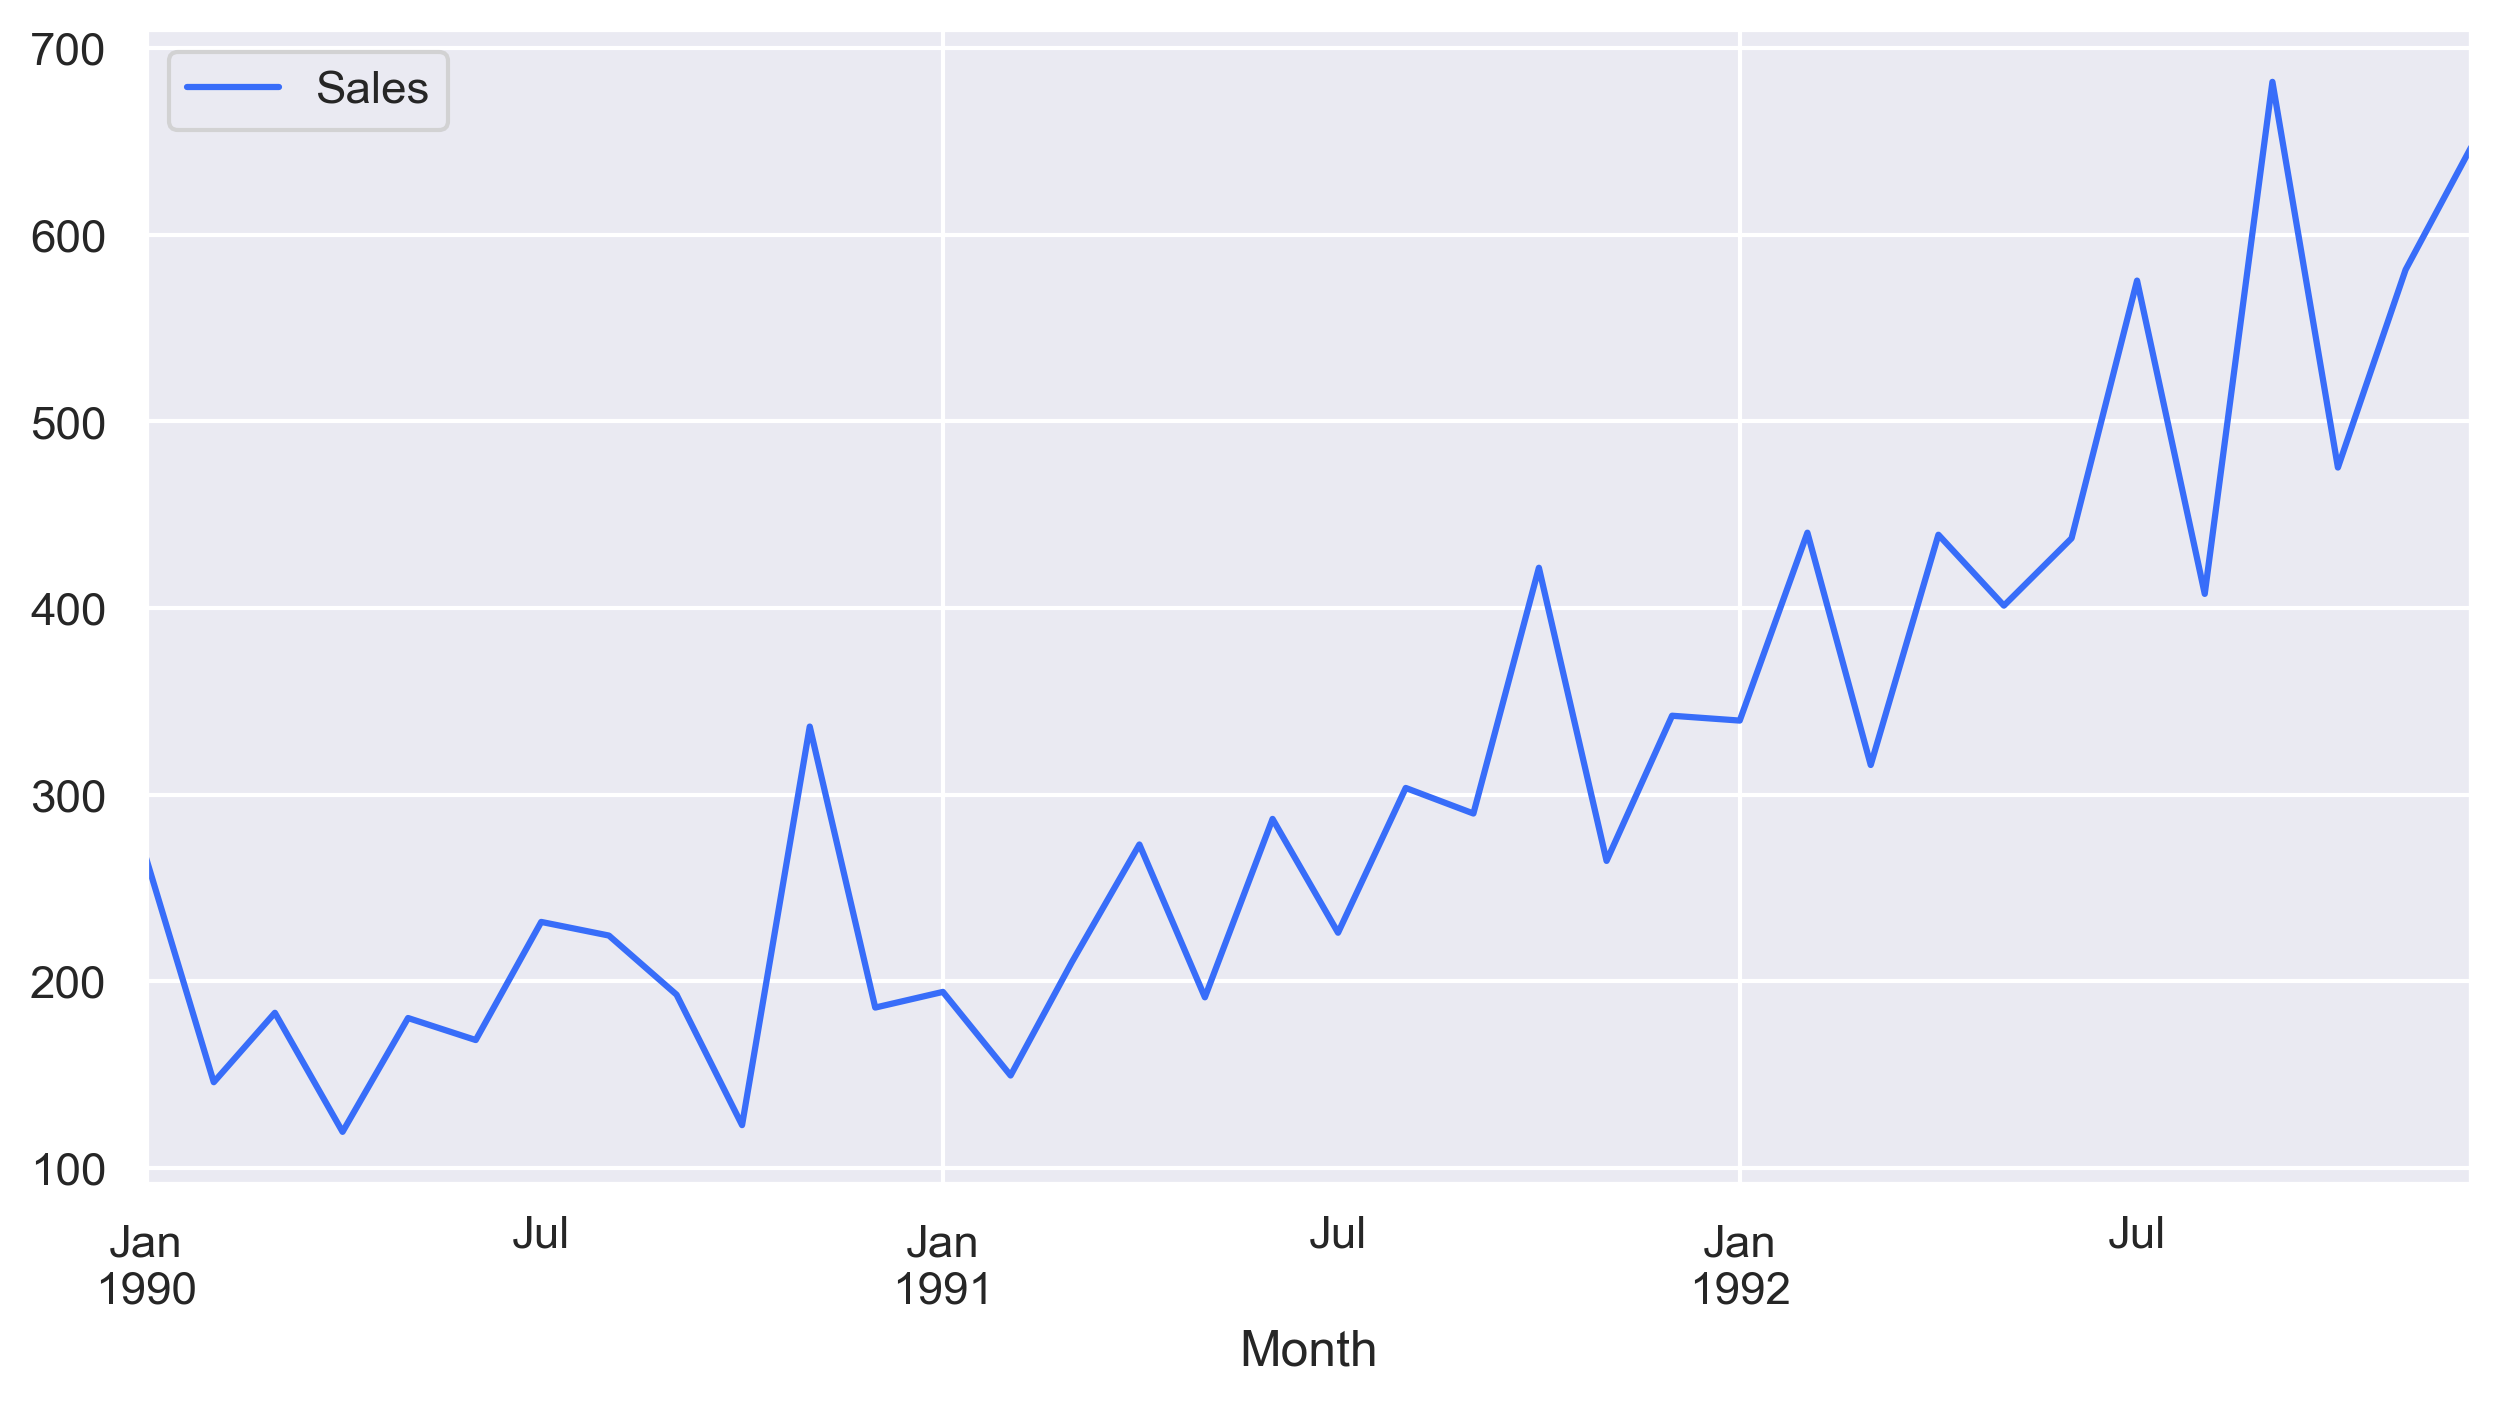

In [10]:
interpolated.plot()

# Downsampling

In [11]:
downsampled = df.resample('Q').mean()
downsampled

,Sales
Month,
1990-03-31,198.333333
1990-06-30,156.033333
1990-09-30,216.366667
1990-12-31,215.100000
1991-03-31,184.633333
1991-06-30,250.566667
1991-09-30,273.166667
1991-12-31,342.800000
1992-03-31,365.333333


In [12]:
downsampled.shape

(12, 1)

<AxesSubplot:xlabel='Month'>

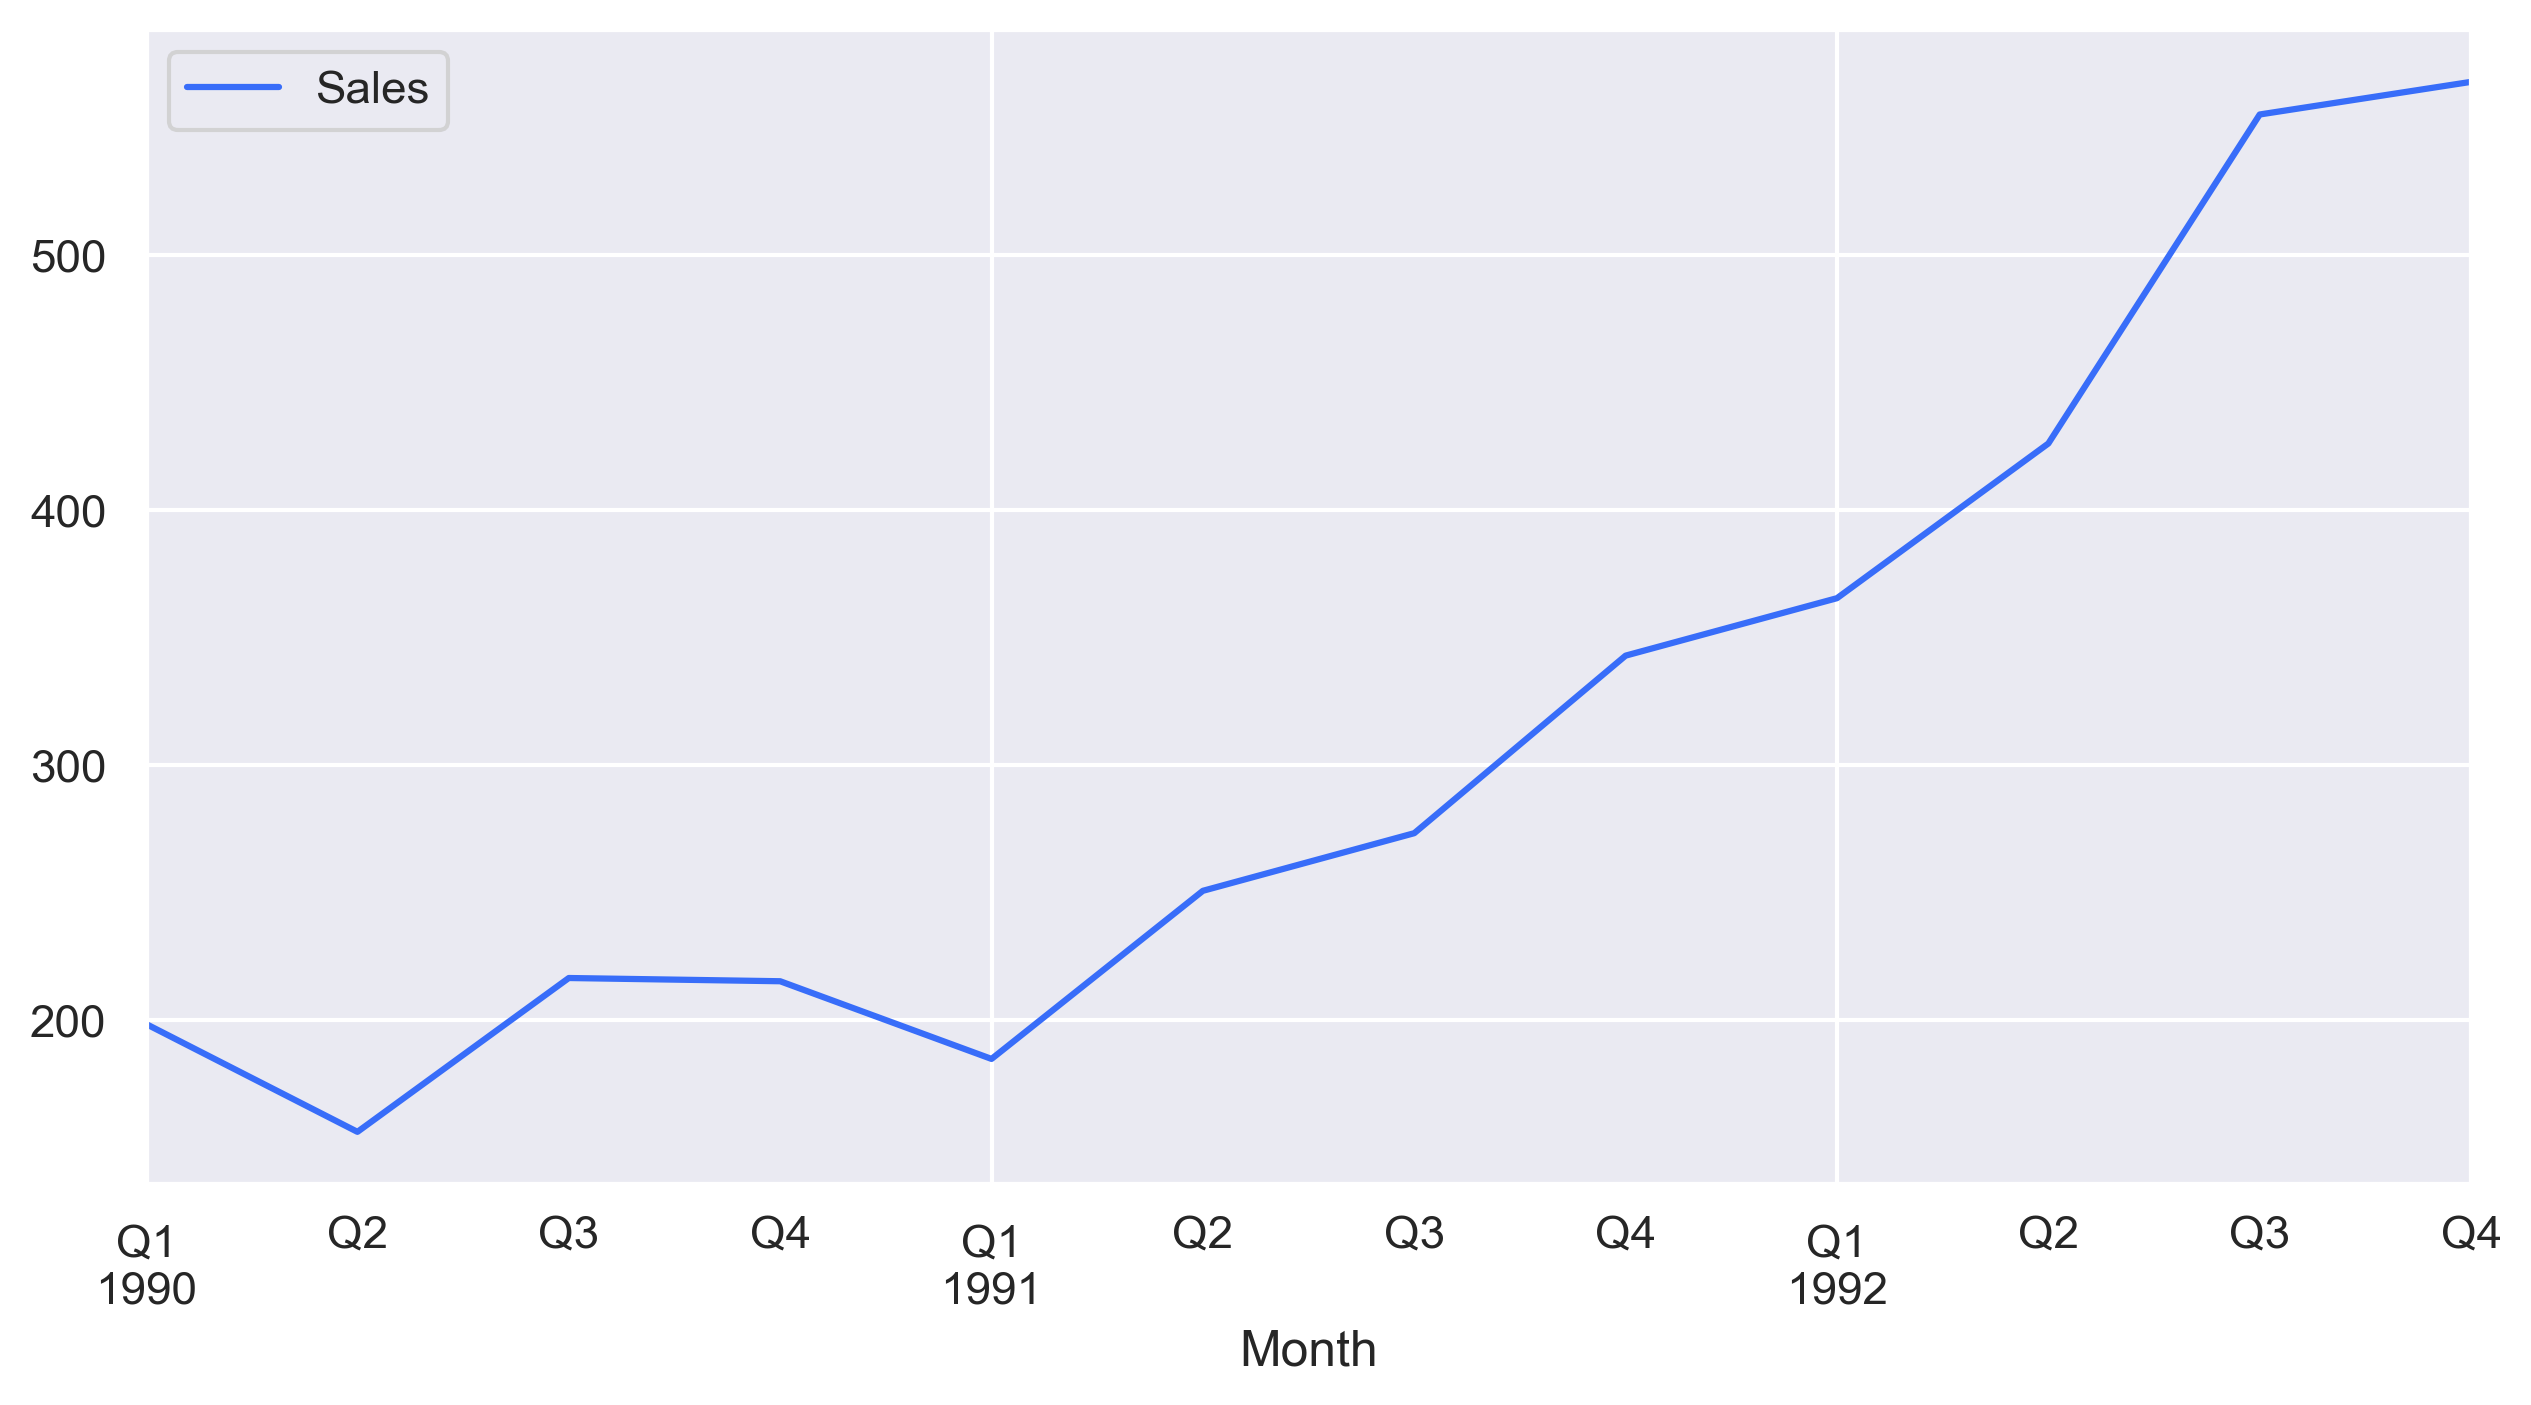

In [13]:
downsampled.plot()